# Question 1: Exploring the Data

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [439]:
combat_file = "combats.csv"
p_file = "pokemon.csv"

df_combat = pd.read_csv(combat_file, sep=",")
df_pokemon = pd.read_csv(p_file, sep=",", index_col='pid')

# Rename pokemon class columns
df_pokemon.rename(columns={'Class 1': 'C1', 'Class 2': 'C2'}, inplace=True)

df_pokemon.head()

,Name,C1,C2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [440]:
df_pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [441]:
df_pokemon['C1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,

I. visualize the relation between these two variables using an appropriate plot;

In [442]:
df_combat.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


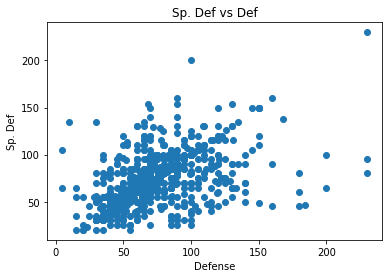

In [443]:
plt.scatter(df_pokemon['Defense'], df_pokemon['Sp. Def'])
plt.xlabel('Defense')
plt.ylabel('Sp. Def')
plt.title('Sp. Def vs Def')
plt.show()

II. list the names of the 3 Pokémon with highest attack-over-defense ratio;

In [444]:
a_d = df_pokemon.copy()
a_d['Ratio'] = df_pokemon['Attack']/df_pokemon['Defense']
a_d.sort_values(['Ratio'], ascending=False).head(3).Name

pid
430    DeoxysAttack Forme
348              Carvanha
20          Mega Beedrill
Name: Name, dtype: object

III. list the names of the 3 Pokémon with lowest attack-over-defense ratio;

In [445]:
a_d.sort_values(['Ratio'], ascending=True).head(3).Name

pid
231     Shuckle
140    Magikarp
485     Bronzor
Name: Name, dtype: object

IV. list the names of the 10 Pokémon with the largest number of victories

In [446]:
victories = df_combat['Winner'].value_counts().to_dict()
victories = pd.DataFrame.from_dict(victories, 'index', columns=['Freq'])
df_freq = victories.merge(df_pokemon, how='inner', left_index=True, right_on='pid')
df_freq.sort_values(['Freq'], ascending=False).head(10).Name

pid
163                Mewtwo
438             Infernape
154            Aerodactyl
428               Jirachi
314               Slaking
432    Deoxys Speed Forme
214               Murkrow
394            Mega Absol
249         Mega Houndoom
155       Mega Aerodactyl
Name: Name, dtype: object

3. (10 points) Professor Oak suspects that Pokémon in the grass class have a stronger regular attack than those in the rock class. Check if he is right and convince him of your conclusion with statistical arguments. Note: If there are Pokémon that are in both classes, discard them. Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.

In [447]:
grass = df_pokemon[((df_pokemon['C1'] == 'Grass') 
                    & (df_pokemon['C2'] != 'Rock')) 
                   | ((df_pokemon['C1'] != 'Rock') 
                      & (df_pokemon['C2'] == 'Grass'))]
rock = df_pokemon[((df_pokemon['C1'] == 'Rock') 
                    & (df_pokemon['C2'] != 'Grass')) 
                   | ((df_pokemon['C1'] != 'Grass') 
                      & (df_pokemon['C2'] == 'Rock'))]

In [448]:
grass['Attack'].describe()

count     93.000000
mean      73.731183
std       24.179645
min       27.000000
25%       59.000000
50%       70.000000
75%       95.000000
max      132.000000
Name: Attack, dtype: float64

In [449]:
rock['Attack'].describe()

count     56.000000
mean      91.785714
std       34.805284
min       10.000000
25%       63.000000
50%       92.500000
75%      116.250000
max      165.000000
Name: Attack, dtype: float64

4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories. Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called pokemon and combats, with the same schema as the small CSV files you’ve been working with above.

In [420]:
import findspark
findspark.init()

from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.functions import min

from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [421]:
pokemon = sc.textFile(p_file) \
                .map(lambda line: line.strip().split(','))
combats = sc.textFile(combat_file) \
                .map(lambda line: line.strip().split(','))

In [422]:
# TODO: Question 1 - Part 4

# Question 2: Prediction

Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.

In [423]:
from sklearn.model_selection import train_test_split

In [425]:
features = ['C1', 'C2', 'HP', 'Attack', 'Defense',
           'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']

# Creating dataframes for first and  second pokemon
first_p = df_pokemon.copy()[features]
second_p = df_pokemon.copy()[features]

first_p.columns = ['1_' + str(col) for col in first_p.columns]
second_p.columns = ['2_' + str(col) for col in second_p.columns]

# Merging pokemon for first and second
df_p = df_combat.merge(first_p, how='inner',
                       left_on='First_pokemon', right_index=True)
df_p = df_p.merge(second_p, how='inner',
                 left_on='Second_pokemon', right_index=True)

# Boolean for First pokemon winning
df_p['1_Won'] = (df_p['Winner'] == df_p['First_pokemon'])

df_p.head()

,First_pokemon,Second_pokemon,Winner,1_C1,1_C2,1_HP,1_Attack,1_Defense,1_Sp. Atk,1_Sp. Def,...,2_C1,2_C2,2_HP,2_Attack,2_Defense,2_Sp. Atk,2_Sp. Def,2_Speed,2_Legendary,1_Won
0,266,298,298,Rock,Ground,50,64,50,45,50,...,Grass,Dark,70,70,40,60,40,60,False,False
14235,73,298,298,Fighting,NaN,70,80,50,35,35,...,Grass,Dark,70,70,40,60,40,60,False,False
21465,373,298,298,Water,Ground,110,78,73,76,71,...,Grass,Dark,70,70,40,60,40,60,False,False
31953,536,298,536,Electric,Flying,50,65,107,105,107,...,Grass,Dark,70,70,40,60,40,60,False,True
40327,368,298,368,Normal,NaN,73,115,60,60,60,...,Grass,Dark,70,70,40,60,40,60,False,True


2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?

In [426]:
p_features = []
for feature in features:
    p_features.append('1_'+feature)
    p_features.append('2_'+feature)

p_features.append('1_Won')

X = pd.get_dummies(df_p[p_features])
X.columns

Index(['1_HP', '2_HP', '1_Attack', '2_Attack', '1_Defense', '2_Defense',
       '1_Sp. Atk', '2_Sp. Atk', '1_Sp. Def', '2_Sp. Def', '1_Speed',
       '2_Speed', '1_Legendary', '2_Legendary', '1_Won', '1_C1_Bug',
       '1_C1_Dark', '1_C1_Dragon', '1_C1_Electric', '1_C1_Fairy',
       '1_C1_Fighting', '1_C1_Fire', '1_C1_Flying', '1_C1_Ghost', '1_C1_Grass',
       '1_C1_Ground', '1_C1_Ice', '1_C1_Normal', '1_C1_Poison', '1_C1_Psychic',
       '1_C1_Rock', '1_C1_Steel', '1_C1_Water', '2_C1_Bug', '2_C1_Dark',
       '2_C1_Dragon', '2_C1_Electric', '2_C1_Fairy', '2_C1_Fighting',
       '2_C1_Fire', '2_C1_Flying', '2_C1_Ghost', '2_C1_Grass', '2_C1_Ground',
       '2_C1_Ice', '2_C1_Normal', '2_C1_Poison', '2_C1_Psychic', '2_C1_Rock',
       '2_C1_Steel', '2_C1_Water', '1_C2_Bug', '1_C2_Dark', '1_C2_Dragon',
       '1_C2_Electric', '1_C2_Fairy', '1_C2_Fighting', '1_C2_Fire',
       '1_C2_Flying', '1_C2_Ghost', '1_C2_Grass', '1_C2_Ground', '1_C2_Ice',
       '1_C2_Normal', '1_C2_Poison', '1_C2_

3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (n_estimators, try values 10, 25, 50, 100) and the maximum tree depth (max_depth, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.

In [427]:
# Labels are values we want to predict
labels = X['1_Won']
# Remove label from features
feat = X.drop('1_Won', axis=1)
# Save features for later
feature_list = list(feat.columns)

# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = \
train_test_split(feat, labels, 
test_size = 0.1)

In [428]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (45000, 86)
Training Labels Shape: (45000,)
Testing Features Shape: (5000, 86)
Testing Labels Shape: (5000,)


4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?

In [429]:
# import model we are using
from sklearn.ensemble import RandomForestRegressor
# instatiate model
n_estimators = [10, 25, 50, 100]
max_depths = [2, 4, 10]

for n_est in n_estimators:
    for max_depth in max_depths:
        # Instantiate model
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=max_depth)
        # Train model on training data
        rf.fit(train_features, train_labels)
        ## Use forest to predict method on test data
        predictions = rf.predict(test_features)
        ## Calculate absolute errors
        errors = np.abs(predictions - test_labels)
        mae = np.round(np.mean(errors), 2)
        std_errors = np.round(np.std(errors), 2)   
        expected_error = np.round(std_errors**2 + mae, 2)
        print('n_estimators={} max_depth={}'.format(n_est, max_depth))
        print('MAE={} Std={} Expected Error={}'.format(mae, std_errors, expected_error))
        

n_estimators=10 max_depth=2
MAE=0.28 Std=0.25 Expected Error=0.34
n_estimators=10 max_depth=4
MAE=0.18 Std=0.23 Expected Error=0.23
n_estimators=10 max_depth=10
MAE=0.08 Std=0.18 Expected Error=0.11
n_estimators=25 max_depth=2
MAE=0.28 Std=0.24 Expected Error=0.34
n_estimators=25 max_depth=4
MAE=0.18 Std=0.22 Expected Error=0.23
n_estimators=25 max_depth=10
MAE=0.08 Std=0.17 Expected Error=0.11
n_estimators=50 max_depth=2
MAE=0.28 Std=0.24 Expected Error=0.34
n_estimators=50 max_depth=4
MAE=0.18 Std=0.23 Expected Error=0.23
n_estimators=50 max_depth=10
MAE=0.08 Std=0.17 Expected Error=0.11
n_estimators=100 max_depth=2
MAE=0.28 Std=0.24 Expected Error=0.34
n_estimators=100 max_depth=4
MAE=0.18 Std=0.22 Expected Error=0.23
n_estimators=100 max_depth=10
MAE=0.08 Std=0.17 Expected Error=0.11


5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).

In [430]:
#TODO

6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.

In [431]:
#TODO

7.(5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

In [432]:
n=10
d=10

# Instantiate model
rf = RandomForestRegressor(n_estimators=n, max_depth=d)
# Train model on training data
rf.fit(train_features, train_labels)
## Use forest to predict method on test data
predictions = rf.predict(test_features)

# Numerical Feature Importance
importances = list(rf.feature_importances_)
feature_importances = [[feature, importance] for feature, importance in zip(feature_list, importances)]
feat_imp = sorted(feature_importances, key=lambda x: float(x[1]), reverse=True)
# Sort feature importances by most important first
for i in range(20):
    pair = feat_imp[i]
    print('Variable: {:20} Importance {}'.format(*pair))

Variable: 1_Speed              Importance 0.4615237734991295
Variable: 2_Speed              Importance 0.4265227458634294
Variable: 2_Attack             Importance 0.018077125769667746
Variable: 1_Attack             Importance 0.01637974132635154
Variable: 2_C2_Ghost           Importance 0.010213805426935764
Variable: 1_C1_Normal          Importance 0.006037068814541636
Variable: 1_C2_Ghost           Importance 0.005849921140815849
Variable: 1_HP                 Importance 0.00542368572059374
Variable: 1_C2_Flying          Importance 0.004051659359470314
Variable: 2_HP                 Importance 0.003992581153039081
Variable: 2_Defense            Importance 0.0037636810502657695
Variable: 1_Defense            Importance 0.0035402552933010653
Variable: 2_C1_Psychic         Importance 0.002282615065986162
Variable: 2_Sp. Def            Importance 0.002196913422760078
Variable: 2_Sp. Atk            Importance 0.002138320295928617
Variable: 1_Sp. Atk            Importance 0.002084116583714

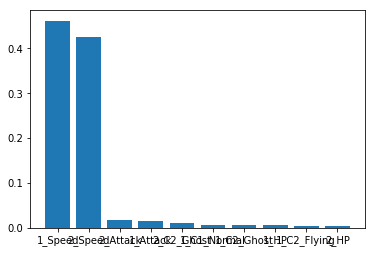

In [433]:
D = dict(feat_imp[:10])

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

# Question 3: Ranking

Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.

1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

In [450]:
from collections import Counter

In [452]:
win_ratio = df_freq.sort_values(by='Freq', ascending=False)
win_ratio.rename(columns={'Freq': 'Num_wins'}, inplace=True)

battles = list(df_combat['First_pokemon']) + list(df_combat['Second_pokemon'])
num_battles = Counter(battles)
df_battles = pd.DataFrame.from_dict(num_battles, orient='index', columns=['Num_battles'])

win_ratio = win_ratio.merge(df_battles, how='inner', left_index=True, right_index=True)
win_ratio['Win_ratio'] = win_ratio['Num_wins']/win_ratio['Num_battles']
win_ratio.sort_values(by='Win_ratio', inplace=True, ascending=False)
top_p = win_ratio.head(10)[['Name', 'C1', 'C2', 'HP', 'Attack', 'Defense',
                   'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']]

top_p.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,78.700000,125.900000,72.60000,83.800000,85.400000,130.100000
std,14.040022,20.129856,15.60769,49.233683,15.826841,13.118689
min,65.000000,95.000000,40.00000,15.000000,65.000000,105.000000
25%,70.000000,108.750000,65.50000,55.500000,75.500000,122.750000
50%,75.500000,131.500000,70.00000,73.500000,82.500000,129.000000
75%,80.000000,139.000000,83.75000,108.250000,93.750000,138.750000
max,106.000000,150.000000,94.00000,194.000000,120.000000,150.000000


In [454]:
df_pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Pokémon tournaments can be represented as a so-called dominance graph. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon i has won a strictly larger number of times against Pokémon j than j has won against i (that is, if i dominates j), there is a directed edge pointing from node i to node j. The dominance graph can be represented as an adjacency matrix G where entry Gij is 1 if there is an edge pointing from i to j, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix A = G + G2. Consider a given row of A; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon

In [455]:
#TODO

3. (7 points) Compute A and extract the 10 Pokémon with the highest dominance score.

In [456]:
df_c = df_combat.copy()

df_c['p1'] = pd.DataFrame(df_c[['First_pokemon', 'Second_pokemon']]).min(axis=1)
df_c['p2'] = pd.DataFrame(df_c[['First_pokemon', 'Second_pokemon']]).max(axis=1)
df_c['p1_won'] = (df_c['p1'] == df_c['Winner'])
df_c['p2_won'] = (df_c['p2'] == df_c['Winner'])


df_c = df_c[['p1', 'p2', 'p1_won', 'p2_won']]
df_c

,p1,p2,p1_won,p2_won
0,266,298,False,True
1,701,702,True,False
2,191,668,False,True
3,237,683,False,True
4,151,231,True,False
5,657,752,True,False
6,134,192,True,False
7,73,545,False,True
8,220,763,False,True
9,31,302,True,False


In [457]:
combat_freq = df_c.copy()
combat_freq['count'] = 1
c_freq = combat_freq.groupby(
    by=['p1', 'p2', 'p1_won', 'p2_won'])['count']\
    .sum().reset_index().set_index(['p1', 'p2'])

n_df = c_freq.copy()

n_df['count_1'] = (n_df['p1_won'])*n_df['count']
n_df['count_2'] = (n_df['p2_won'])*n_df['count']

n_df.drop(['p1_won', 'p2_won', 'count'], axis=1)

count_1  count_2
p1  p2                   
1   6          0        1
    21         0        1
    25         0        1
    26         0        1
    37         0        1
    43         0        1
    50         1        0
    54         0        1
    64         0        1
    75         0        2
    76         1        0
    84         0        1
    94         1        0
    106        0        1
    112        0        1
    115        0        1
    126        0        1
    127        0        1
    128        0        1
    131        0        1
    140        1        0
    153        0        1
    161        0        1
    162        0        1
    178        0        1
    185        0        1
    190        1        0
    191        1        0
    194        1        0
    199        1        0
...          ...      ...
778 780        1        0
    792        1        0
    794        0        1
    799        0        1
779 786        0        1
780 785        0        1
    788        1        0
    792        0        1
    794        0        1
781 783        1        0
    791        0        1
    797        0        1
783 787        0        1
784 790        3        0
    798        0        1
    800        0        1
785 794        0        1
    796        1        0
786 787        1        0
    790        1        0
    793        0        1
    795        1        0
787 798        0        1
789 794        0        1
790 791        1        0
    794        0        1
791 793        0        2
    798        0        1
793 794        1        0
795 799        1        0

[46336 rows x 2 columns]

In [458]:
min_id = 0
max_id = 801

G = np.zeros((max_id, max_id))
for index, row in n_df.iterrows():
    i, j = index[0], index[1]
    if row['count_1'] > row['count_2']:
        G[i][j] = 1
    else:
        G[j][i] = 1

A = G + G@G

In [459]:
sum_ = np.sum(A, axis=1).tolist()

df_sum = pd.DataFrame(sum_, columns=['A_sum'])

df_a = df_sum.merge(df_pokemon, how='inner', left_index=True, right_index=True)
a_sort = df_a.sort_values('A_sum', ascending=False).head(10)[
    ['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
]

a_sort

,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
163,Mewtwo,106,110,90,154,90,130
432,Deoxys Speed Forme,50,95,90,95,90,180
154,Aerodactyl,80,105,65,60,75,130
147,Jolteon,65,65,60,110,95,130
427,Mega Rayquaza,105,180,100,180,100,115
430,DeoxysAttack Forme,50,180,20,180,20,150
249,Mega Houndoom,75,90,90,140,90,115
155,Mega Aerodactyl,80,135,85,70,95,150
394,Mega Absol,65,150,60,115,60,115
164,Mega Mewtwo X,106,190,100,154,100,130


In [460]:
top_p

,Name,C1,C2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False
513,Weavile,Dark,Ice,70,120,65,45,85,125,False
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False
727,Greninja,Water,Dark,72,95,67,103,71,122,False
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True
350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,False


In [462]:
a_sort.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,78.200000,130.000000,76.000000,125.800000,81.500000,134.50000
std,21.652816,43.588989,24.922101,42.720799,24.838366,20.47356
min,50.000000,65.000000,20.000000,60.000000,20.000000,115.00000
25%,65.000000,97.500000,61.250000,98.750000,78.750000,118.75000
50%,77.500000,122.500000,87.500000,127.500000,90.000000,130.00000
75%,98.750000,172.500000,90.000000,154.000000,95.000000,145.00000
max,106.000000,190.000000,100.000000,180.000000,100.000000,180.00000


In [463]:
top_p.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,78.700000,125.900000,72.60000,83.800000,85.400000,130.100000
std,14.040022,20.129856,15.60769,49.233683,15.826841,13.118689
min,65.000000,95.000000,40.00000,15.000000,65.000000,105.000000
25%,70.000000,108.750000,65.50000,55.500000,75.500000,122.750000
50%,75.500000,131.500000,70.00000,73.500000,82.500000,129.000000
75%,80.000000,139.000000,83.75000,108.250000,93.750000,138.750000
max,106.000000,150.000000,94.00000,194.000000,120.000000,150.000000


4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?

The dominance scores w/dominance graph has more weight on the `Sp. Atk` column. This is shown because the mean of the top pokemon w/dominance graph have a higher value than the mean of the top pokemon w/winning ratio. Overall, the mean of the different properties of the pokemon are higher in the dominance graph, except for the `Sp. Def` column.

5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.